# Data Exploration

Data Description
* Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers
* X1 = my order was delivered on time
* X2 = contents of my order was as I expected
* X3 = I ordered everything I wanted to order
* X4 = I paid a good price for my order
* X5 = I am satisfied with my courier
* X6 = the app makes ordering easy for me

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('data/ACME-HappinessSurvey2020.csv')
df.columns = ['customer satisfaction', 'my order was delivered on time', 'contents of my order was as I expected', 'I ordered everything I wanted to order', 'I paid good price for my order', 'I am satisfied with my courier', 'the app makes ordering easy']
df.head()

,customer satisfaction,my order was delivered on time,contents of my order was as I expected,I ordered everything I wanted to order,I paid good price for my order,I am satisfied with my courier,the app makes ordering easy
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [3]:
print(f'There are {df.shape[0]} observations and {df.shape[1]} features in the dataset.')

There are 126 observations and 7 features in the dataset.


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column                                  Non-Null Count  Dtype
---  ------                                  --------------  -----
 0   customer satisfaction                   126 non-null    int64
 1   my order was delivered on time          126 non-null    int64
 2   contents of my order was as I expected  126 non-null    int64
 3   I ordered everything I wanted to order  126 non-null    int64
 4   I paid good price for my order          126 non-null    int64
 5   I am satisfied with my courier          126 non-null    int64
 6   the app makes ordering easy             126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB
None


We can see that there are no missing values present

In [5]:
df.describe()

,customer satisfaction,my order was delivered on time,contents of my order was as I expected,I ordered everything I wanted to order,I paid good price for my order,I am satisfied with my courier,the app makes ordering easy
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


One of the descriptive statistics shown above is the average score that people gave for the respective questions. Four of the questions had averages that were lower than the median (50%) and two of the questions had averages were slightly higher than their medians. The discrepancy between the mean and median are caused by outliers which we will look for in following boxplots.

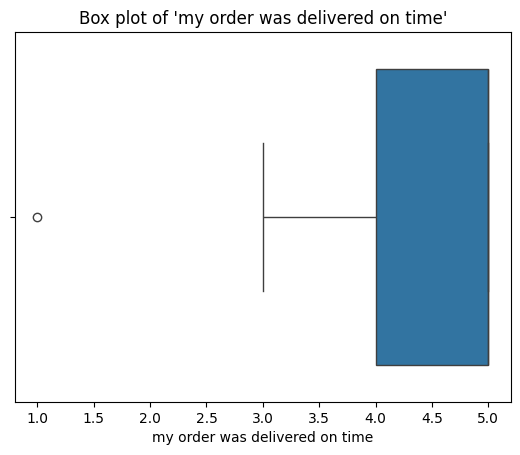

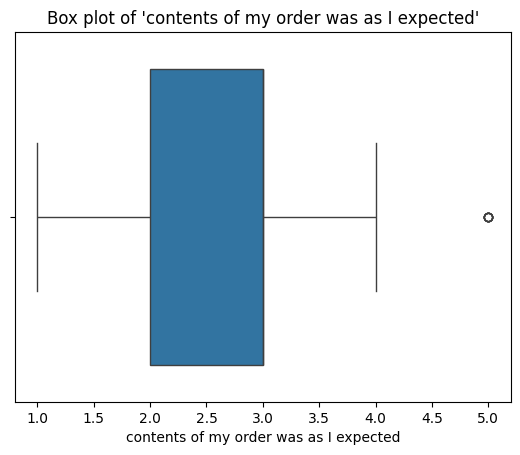

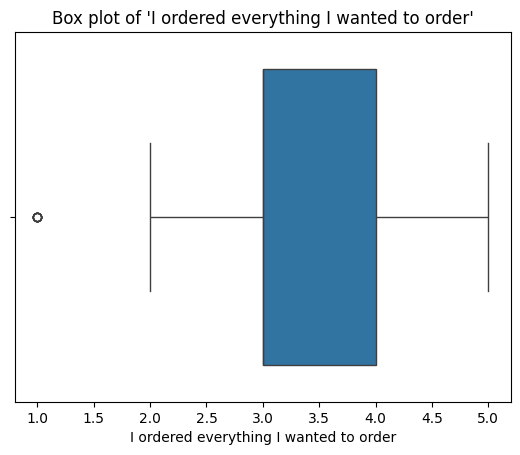

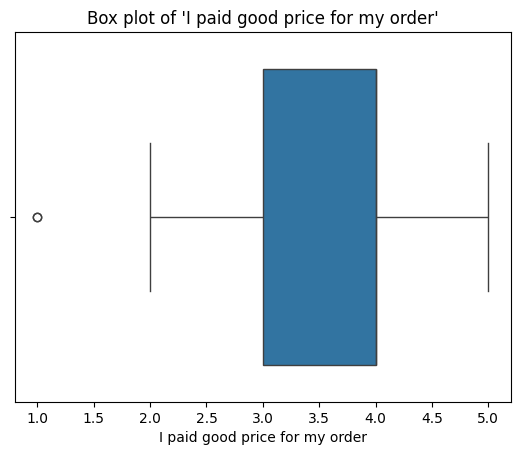

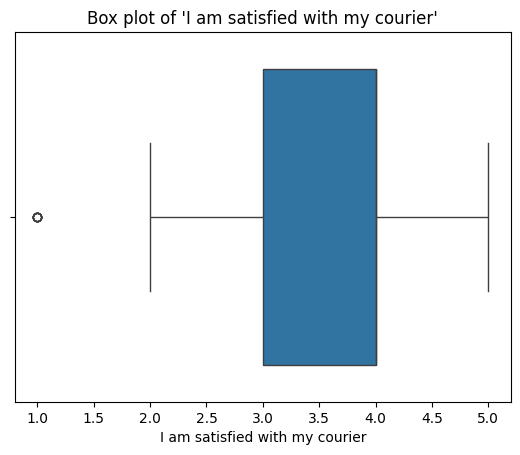

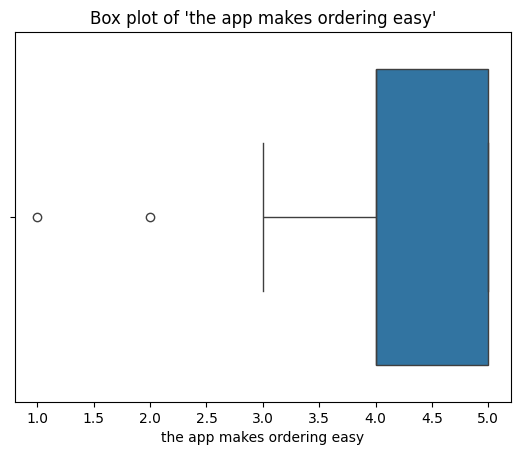

In [6]:
for col in df.columns:
    if col != 'customer satisfaction':
        sns.boxplot(data=df, x=col, orient='h')
        plt.title("Box plot of '{}'".format(col))
        plt.show()

As we can see all of the boxplots show a few outliers in the questions that are influencing the skew of the distribution of the questions. The pairplot below shows the distribution of the questions in a different format.

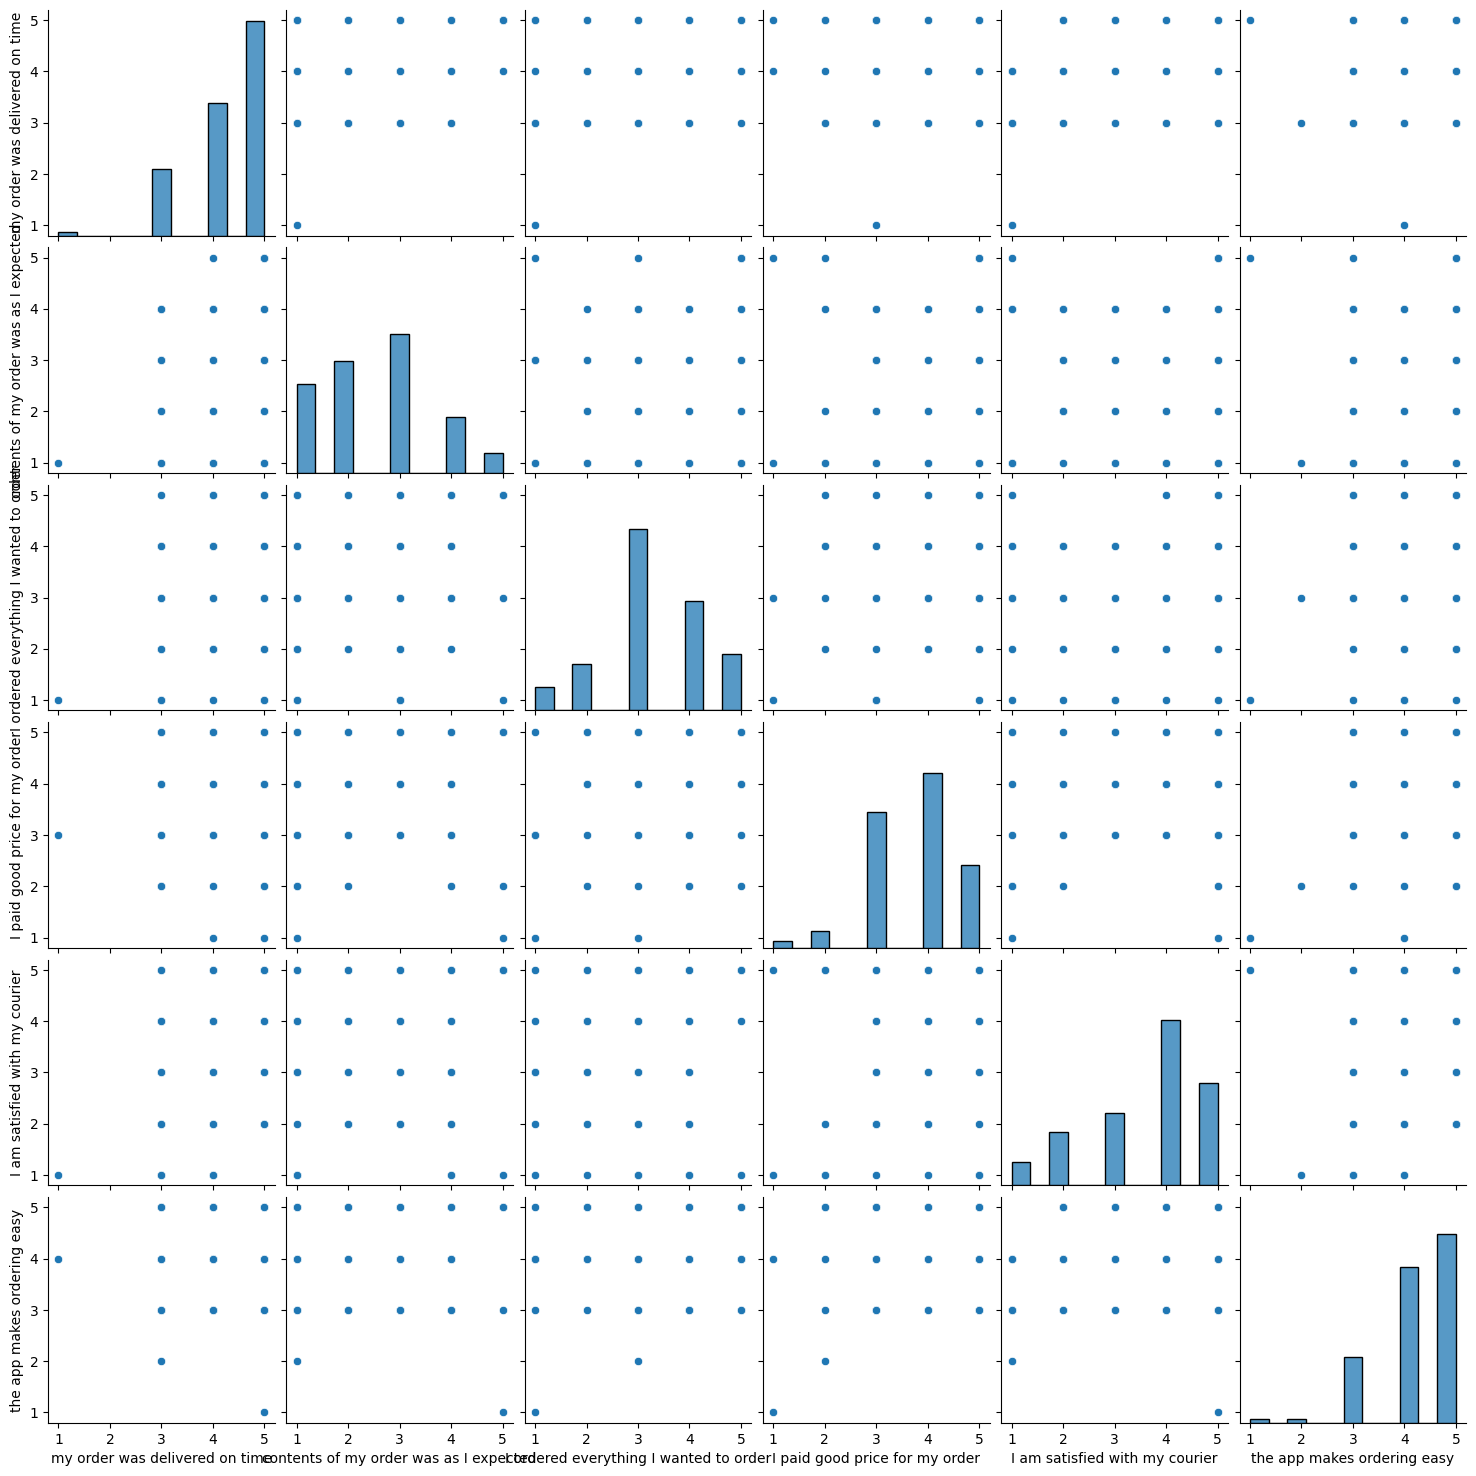

In [7]:
sns.pairplot(data=df.drop(['customer satisfaction'], axis=1))
plt.show()

## Target Variable

In [8]:
print(df['customer satisfaction'].value_counts())
print(df['customer satisfaction'].value_counts(normalize=True))

customer satisfaction
1    69
0    57
Name: count, dtype: int64
customer satisfaction
1    0.547619
0    0.452381
Name: proportion, dtype: float64


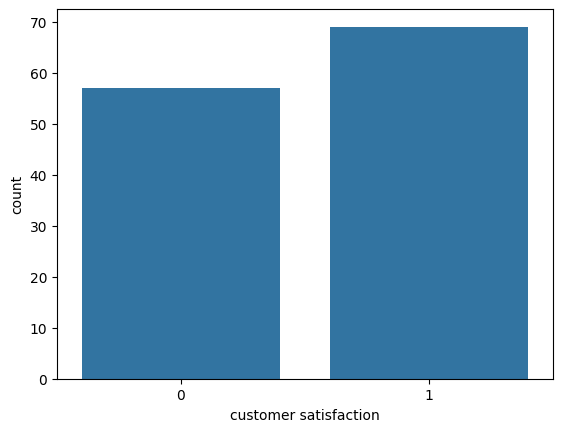

In [9]:
sns.countplot(data=df, x='customer satisfaction')
plt.show()

For our target feature (customer satisfaction) we see that there are only two answers - 1 for satisfied and 0 for disatisfied. The target feature is also roughly equal - satisfied customers make up ~55% of the dataset and disatisfied customers make up ~45% of the dataset.

In [10]:
satisfied_customers_df = df[df['customer satisfaction'] == 1]

satisfied_customers_df.describe()

,customer satisfaction,my order was delivered on time,contents of my order was as I expected,I ordered everything I wanted to order,I paid good price for my order,I am satisfied with my courier,the app makes ordering easy
count,69.0,69.000000,69.000000,69.000000,69.000000,69.000000,69.000000
mean,1.0,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812
std,0.0,0.698311,1.106441,1.022342,0.900649,1.064621,0.768908
min,1.0,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.0,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.0,5.000000,2.000000,3.000000,4.000000,4.000000,5.000000
75%,1.0,5.000000,3.000000,4.000000,4.000000,5.000000,5.000000
max,1.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
satisfied_customers_df = df[df['customer satisfaction'] == 0]

satisfied_customers_df.describe()

,customer satisfaction,my order was delivered on time,contents of my order was as I expected,I ordered everything I wanted to order,I paid good price for my order,I am satisfied with my courier,the app makes ordering easy
count,57.0,57.000000,57.000000,57.000000,57.000000,57.000000,57.000000
mean,0.0,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
std,0.0,0.851064,1.134170,1.007802,0.848484,1.189712,0.838455
min,0.0,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000
25%,0.0,4.000000,2.000000,3.000000,3.000000,3.000000,3.000000
50%,0.0,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,0.0,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,0.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Looking at both satisfied and disatisfied customers seperately we can see that the satisfied customers have slightly higher averages (as we would expect) except for the question 'contents of my order was as I expected'; that question had a slightly higher average for the disatisfied customers.
* One thing to point out for future examination is that no matter if the customer was satisfied or disatisfied the contents of their order looked to be given less than 3 on average. A fairly big concern, especially for a food delivery company.

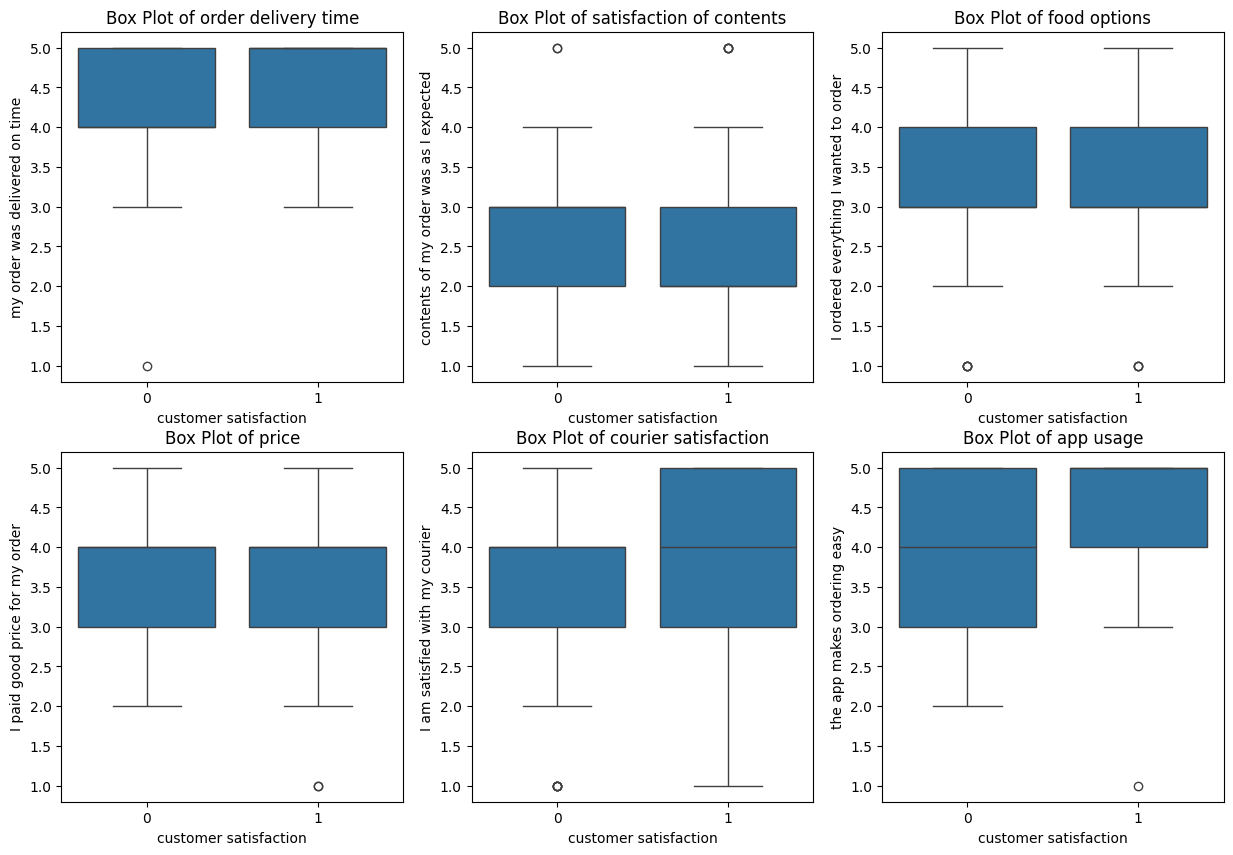

In [12]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.boxplot(x='customer satisfaction', y='my order was delivered on time', data=df)
plt.title('Box Plot of order delivery time')
plt.subplot(2, 3, 2)
sns.boxplot(x='customer satisfaction', y='contents of my order was as I expected', data=df)
plt.title('Box Plot of satisfaction of contents')
plt.subplot(2, 3, 3)
sns.boxplot(x='customer satisfaction', y='I ordered everything I wanted to order', data=df)
plt.title('Box Plot of food options')
plt.subplot(2, 3, 4)
sns.boxplot(x='customer satisfaction', y='I paid good price for my order', data=df)
plt.title('Box Plot of price')
plt.subplot(2, 3, 5)
sns.boxplot(x='customer satisfaction', y='I am satisfied with my courier', data=df)
plt.title('Box Plot of courier satisfaction')
plt.subplot(2, 3, 6)
sns.boxplot(x='customer satisfaction', y='the app makes ordering easy', data=df)
plt.title('Box Plot of app usage')
plt.show()

As mentioned above the outliers can be seen in numerous plots; there are not a lot per se, but we have a better visual of why the mean and median are diverging. The two plots that we notice a difference between the two types of customers is their courier satisfaction and how easy the app made it to order their food (the last two plots on the bottom row).

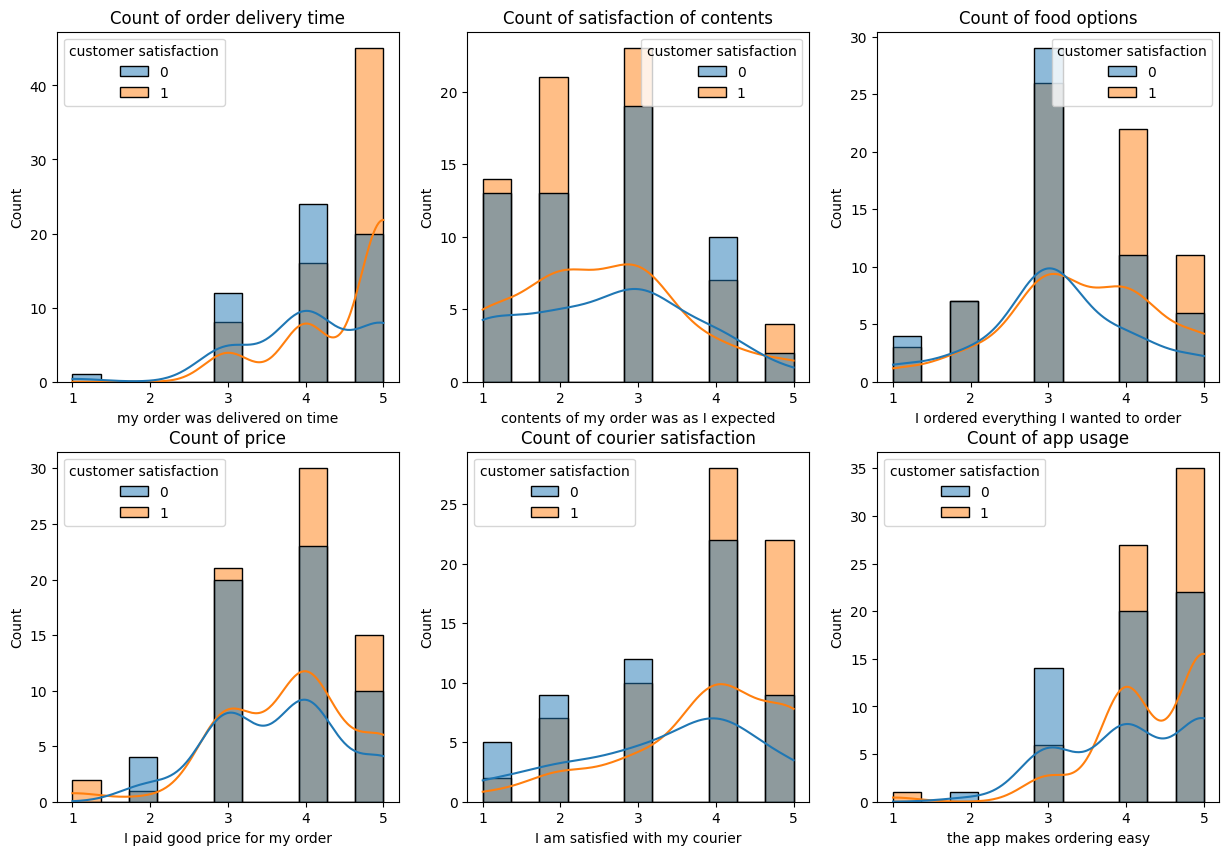

In [13]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.histplot(hue='customer satisfaction', x='my order was delivered on time', data=df, kde=True)
plt.title('Count of order delivery time')
plt.subplot(2, 3, 2)
sns.histplot(hue='customer satisfaction', x='contents of my order was as I expected', data=df, kde=True)
plt.title('Count of satisfaction of contents')
plt.subplot(2, 3, 3)
sns.histplot(hue='customer satisfaction', x='I ordered everything I wanted to order', data=df, kde=True)
plt.title('Count of food options')
plt.subplot(2, 3, 4)
sns.histplot(hue='customer satisfaction', x='I paid good price for my order', data=df, kde=True)
plt.title('Count of price')
plt.subplot(2, 3, 5)
sns.histplot(hue='customer satisfaction', x='I am satisfied with my courier', data=df, kde=True)
plt.title('Count of courier satisfaction')
plt.subplot(2, 3, 6)
sns.histplot(hue='customer satisfaction', x='the app makes ordering easy', data=df, kde=True)
plt.title('Count of app usage')
plt.show()

Where the boxplots give a representation of the spread of the data, the histograms show a count of the answers to the questions. The counts of the answers given show a preponderance of the answers given (>70%) for satisfied customers on their courier satisfaction was either a 4 or 5 and the same showed (>85%) for their response on the simplicity of the app to order food. 
The disatisfied customers showed (as expected) a greater amount of questions answered with lower numbers on those two questions.

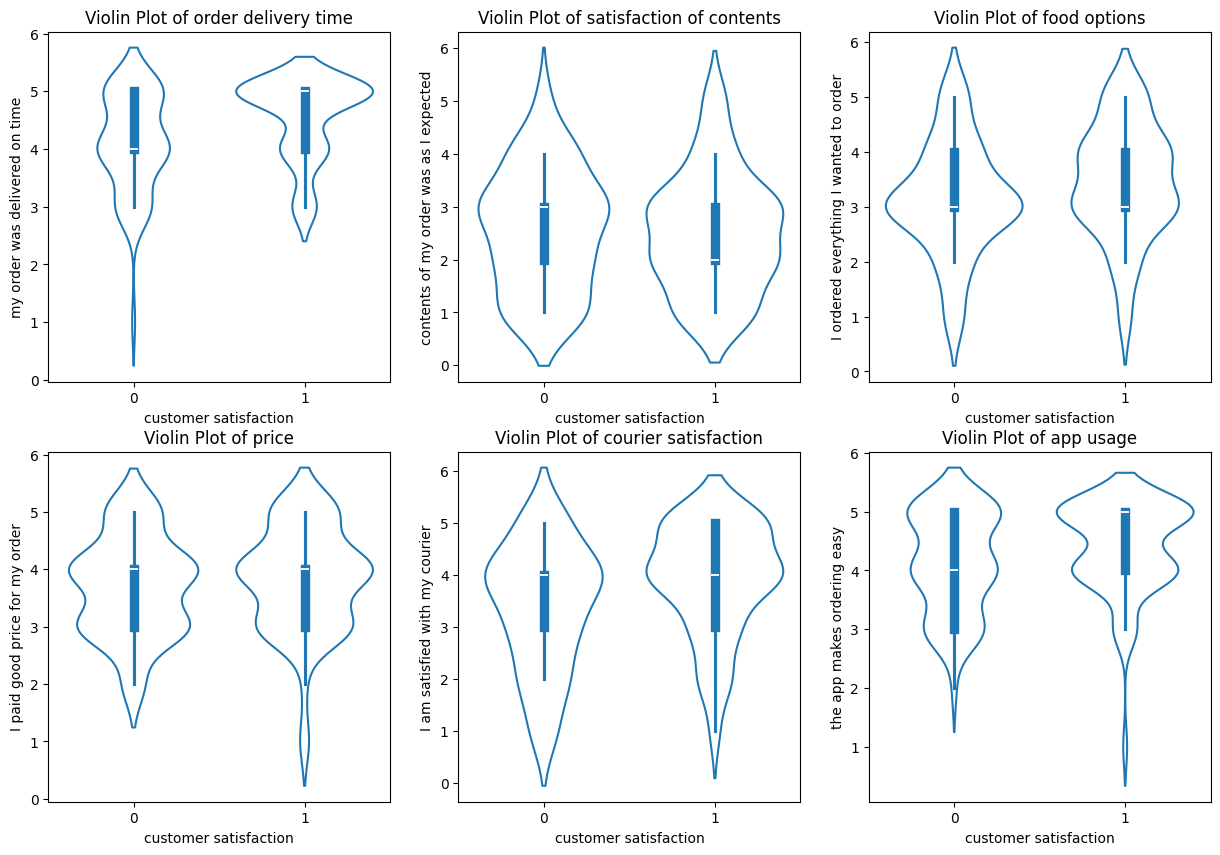

In [14]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.violinplot(x='customer satisfaction', y='my order was delivered on time', data=df, fill=False)
plt.title('Violin Plot of order delivery time')
plt.subplot(2, 3, 2)
sns.violinplot(x='customer satisfaction', y='contents of my order was as I expected', data=df, fill=False)
plt.title('Violin Plot of satisfaction of contents')
plt.subplot(2, 3, 3)
sns.violinplot(x='customer satisfaction', y='I ordered everything I wanted to order', data=df, fill=False)
plt.title('Violin Plot of food options')
plt.subplot(2, 3, 4)
sns.violinplot(x='customer satisfaction', y='I paid good price for my order', data=df, fill=False)
plt.title('Violin Plot of price')
plt.subplot(2, 3, 5)
sns.violinplot(x='customer satisfaction', y='I am satisfied with my courier', data=df, fill=False)
plt.title('Violin Plot of courier satisfaction')
plt.subplot(2, 3, 6)
sns.violinplot(x='customer satisfaction', y='the app makes ordering easy', data=df, fill=False)
plt.title('Violin Plot of app usage')
plt.show()

The violin plots above show a mix of the boxplots and the histograms. The first plot in the top row show that the satisfied customers were more likely to give a 5 where the disatisfied customers were spread out between 3 and 5. The plot in the first row on the left shows the disatisfied customers looking to give 3 as an answer and the satisfied customers giving between 3 and 4.

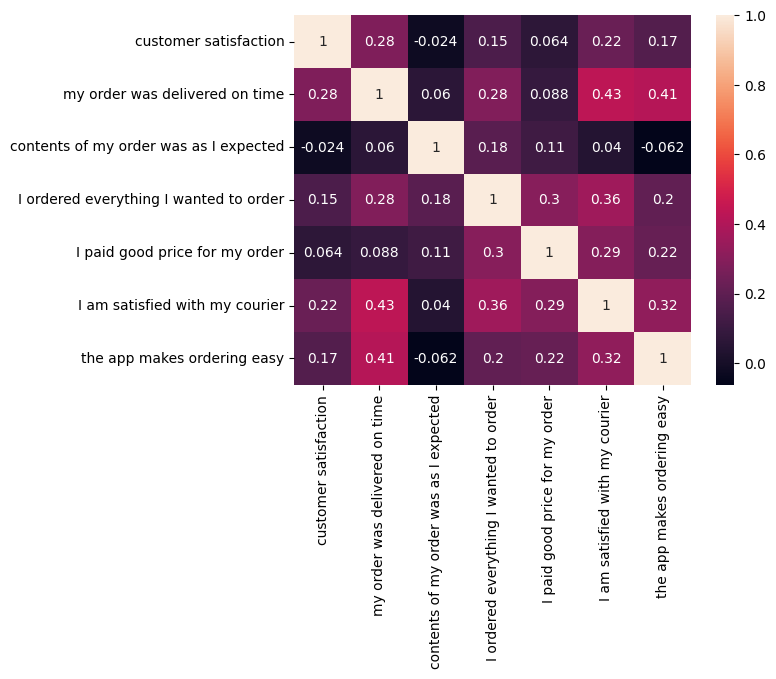

In [15]:
sns.heatmap(data=df.corr(), annot=True)
plt.show()

The heatmap shows the correlations between the questions on the questionaire. A moderate correlation is shown between the question 'my order was delivered on time' and 'I am satisfied with my courier' and 'the app makes ordering easy'. Other moderate correlations are shown between 'I am satisfied with my courier' and 'I ordered everything I wanted to order' and between 'the app makes ordering easy' and 'I am satisfied with my courier'. 
Weak - no correlations were found between questions that have dark colored boxes.